# Пример работы алгоритма

Загружаем список предметов и тестовое изображение

In [1]:
from ObjectsCollection import ObjectsCollection
import cv2 as cv

collection = ObjectsCollection('objects_list.txt')
test_image = cv.imread('test_data/input1.jpg')

Number of loaded objects: 10


Загружаем тестовое изображение

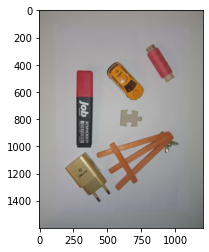

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

test_image = cv.imread('test_data/input1.jpg')

plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

Создаём класс для соотнесения объектов из заданного набора с объектами на изображении и вызываем метод ```match```.\
Выполнение данного метода может занять продолжительное количество времени.

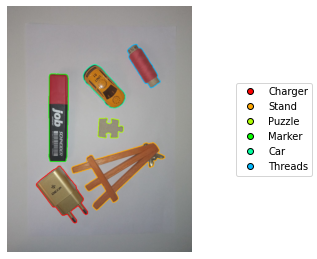

In [3]:
from ObjectMatching import ObjectMatcher

matcher = ObjectMatcher()
found_objects = matcher.match(collection, test_image)

Далее загружаем многоугольник, в котором необходимо разместить объекты. Для этого используется вспомогательная функция ```parse_poly```.

In [48]:
from Utils import parse_poly

bounding_poly_file = open('test_data/poly1.txt')
bounding_poly = parse_poly(bounding_poly_file.read())
print(bounding_poly)

[(0.0, 0.0), (4.0, 14.0), (12.0, 15.0), (14.0, 14.0), (18.0, 10.0), (18.0, 3.0), (8.0, -4.0), (2.0, -2.0)]


Для упаковки будем использовать стратегию ```Bottom-Left```, поэтому создаём класс который её реализует, передавая в конструктор ограничивающий многоугольник.
Получаем у объектов полигоны, аппроксимирующие их форму, и размещаем их при помощи метода ```pack```.

In [49]:
from BLPackage import BLPackage

package = BLPackage(bounding_poly)
polygons = [obj.polygon for obj in found_objects]
package.pack(polygons)

True

Видим, что упаковка прошла успешна. Нарисуем результат.

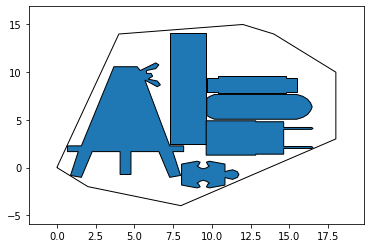

In [50]:
package.draw()